<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/D_Aasritha_Reddy/forecasting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Data Import and Overview**

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("/content/modelling_final.csv")

In [4]:
data.head()

,season,match_id,innings_id,batsman1_name,home_team,away_team,current_innings,over,ball,runs,wicket_id,wkt_batsman_runs,cumulative_runs,run_rate,wickets_lost,home_teams,away_teams
0,2023.0,1359475,1,Devon Conway,GT,CSK,5,1,1,0,0.0,0.0,0,0.000000,0,0,5
1,2023.0,1359475,1,Devon Conway,GT,CSK,5,1,2,1,0.0,0.0,1,0.909091,0,0,5
2,2023.0,1359475,1,Ruturaj Gaikwad,GT,CSK,5,1,3,0,0.0,0.0,1,0.909091,0,0,5
3,2023.0,1359475,1,Ruturaj Gaikwad,GT,CSK,5,1,4,1,0.0,0.0,2,1.818182,0,0,5
4,2023.0,1359475,1,Devon Conway,GT,CSK,5,1,5,0,0.0,0.0,2,1.818182,0,0,5


In [5]:
filtered_data=data[data['batsman1_name'] == 'Rohit Sharma']

In [6]:
total = filtered_data.groupby('season')['runs'].sum()

In [7]:
total

,runs
season,
2008.0,309
2009.0,379
2010.0,410
2011.0,382
2012.0,448
2013.0,548
2014.0,391
2015.0,492
2016.0,498


In [8]:
if isinstance(total, pd.Series):
    total = total.reset_index()

In [9]:
# creating time column from season
total['season'] = pd.to_datetime(total['season'], format='%Y')

In [10]:
total

,season,runs
0,2008-01-01,309
1,2009-01-01,379
2,2010-01-01,410
3,2011-01-01,382
4,2012-01-01,448
5,2013-01-01,548
6,2014-01-01,391
7,2015-01-01,492
8,2016-01-01,498
9,2017-01-01,349


# **EDA Visualisation**

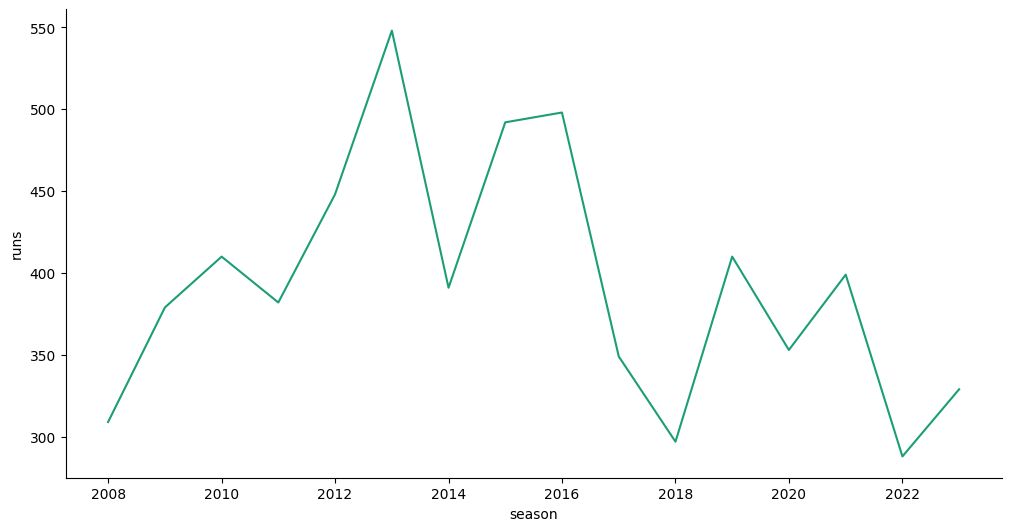

In [11]:
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['season']
  ys = series['runs']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total.sort_values('season', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('season')
_ = plt.ylabel('runs')

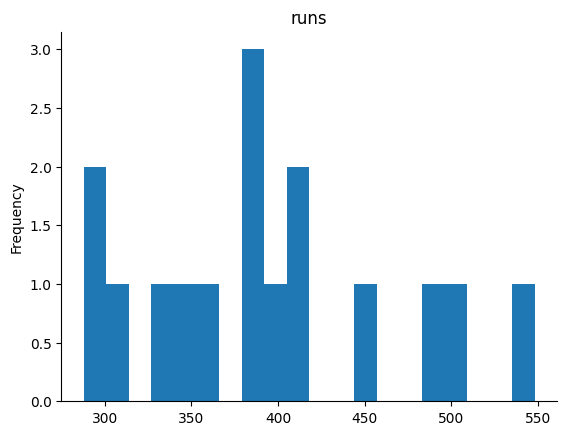

In [12]:
total['runs'].plot(kind='hist', bins=20, title='runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

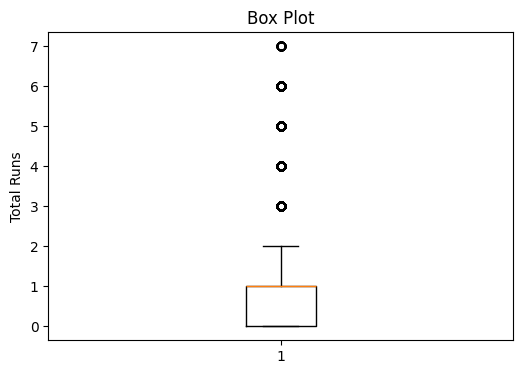

In [13]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['runs'])
plt.title('Box Plot')
plt.ylabel('Total Runs')
plt.show()

# **Feature Engineering**

In [14]:
data['Lag_1'] = data['runs'].shift(1)
data['Lag_2'] = data['runs'].shift(2)

In [15]:
data.index = pd.to_datetime(data.index)

In [16]:
data['Month'] = data.index.month
data['Year'] = data.index.year

In [17]:
data

,season,match_id,innings_id,batsman1_name,home_team,away_team,current_innings,over,ball,runs,wicket_id,wkt_batsman_runs,cumulative_runs,run_rate,wickets_lost,home_teams,away_teams,Lag_1,Lag_2,Month,Year
1970-01-01 00:00:00.000000000,2023.0,1359475,1,Devon Conway,GT,CSK,5,1,1,0,0.0,0.0,0,0.000000,0,0,5,NaN,NaN,1,1970
1970-01-01 00:00:00.000000001,2023.0,1359475,1,Devon Conway,GT,CSK,5,1,2,1,0.0,0.0,1,0.909091,0,0,5,0.0,NaN,1,1970
1970-01-01 00:00:00.000000002,2023.0,1359475,1,Ruturaj Gaikwad,GT,CSK,5,1,3,0,0.0,0.0,1,0.909091,0,0,5,1.0,0.0,1,1970
1970-01-01 00:00:00.000000003,2023.0,1359475,1,Ruturaj Gaikwad,GT,CSK,5,1,4,1,0.0,0.0,2,1.818182,0,0,5,0.0,1.0,1,1970
1970-01-01 00:00:00.000000004,2023.0,1359475,1,Devon Conway,GT,CSK,5,1,5,0,0.0,0.0,2,1.818182,0,0,5,1.0,0.0,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000236400,2008.0,336016,1,Virat Kohli,KXIP,RCB,4,3,4,1,0.0,0.0,6,1.935484,1,10,4,0.0,1.0,1,1970
1970-01-01 00:00:00.000236401,2008.0,336016,1,Misbah-ul-Haq,KXIP,RCB,4,3,5,4,0.0,0.0,10,3.225806,1,10,4,1.0,0.0,1,1970
1970-01-01 00:00:00.000236402,2008.0,336016,1,Misbah-ul-Haq,KXIP,RCB,4,3,6,4,0.0,0.0,14,4.516129,1,10,4,4.0,1.0,1,1970
1970-01-01 00:00:00.000236403,2008.0,336016,1,Virat Kohli,KXIP,RCB,4,4,1,4,0.0,0.0,18,4.390244,1,10,4,4.0,4.0,1,1970


# **Stationary Check**

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data['runs'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -63.845362
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


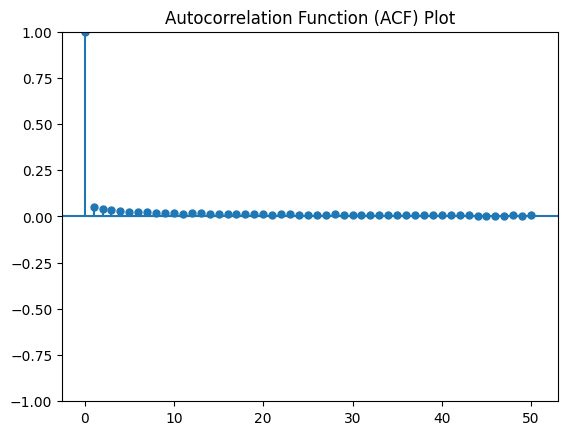

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['runs'].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

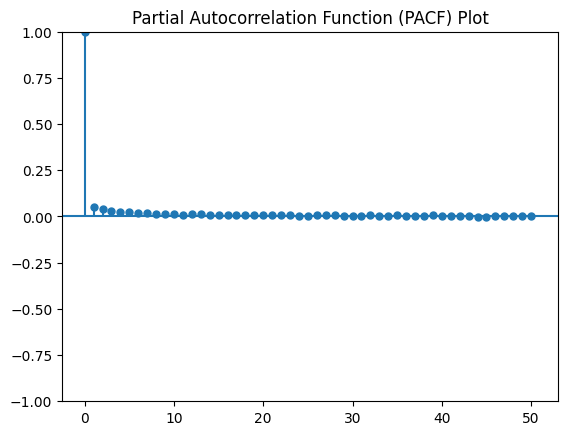

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data['runs'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()

# Data is not Stationary

# **Differncing**

In [21]:
data['Diff_1'] = data['runs'] - data['runs'].shift(1)

In [22]:
adf_result_diff = adfuller(data['Diff_1'].dropna())
print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -88.080352
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


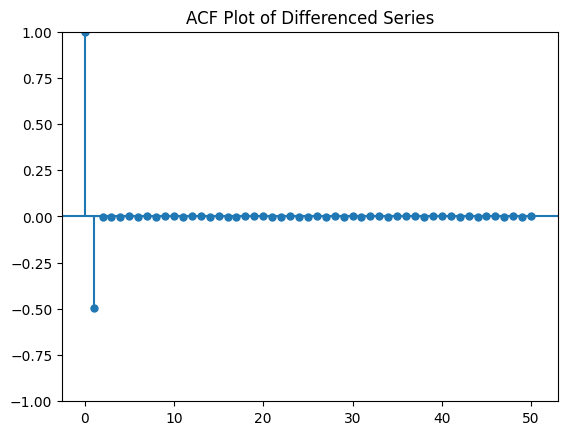

In [23]:
plot_acf(data['Diff_1'].dropna(), lags=50)
plt.title('ACF Plot of Differenced Series')
plt.show()

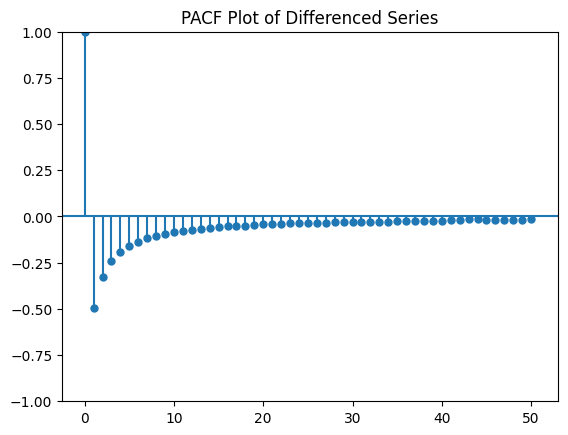

In [24]:
plot_pacf(data['Diff_1'].dropna(), lags=50)
plt.title('PACF Plot of Differenced Series')
plt.show()

#Data is Stationary

# **Modelling and Forecasting**

In [25]:
total.set_index('season', inplace=True)

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [27]:
model = SARIMAX(total,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 4))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [28]:
result = model.fit()
result

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
forecast = result.get_forecast(steps=10)
forecast_runs = forecast.predicted_mean.astype(int)

In [32]:
print(f"Predicted runs for next season (2025): {forecast_runs}")

Predicted runs for next season (2025): 2024-01-01    339
2025-01-01    354
2026-01-01    282
2027-01-01    340
2028-01-01    338
2029-01-01    354
2030-01-01    281
2031-01-01    339
2032-01-01    337
2033-01-01    353
Freq: YS-JAN, Name: predicted_mean, dtype: int64


In [34]:
forecast_df = pd.DataFrame({'season': pd.date_range(start='2023-01-01', periods=10, freq='YS'), 'predicted_runs': forecast_runs.values})

In [35]:
merged_data = pd.concat([total.reset_index(), forecast_df], ignore_index = True)
merged_data['season'] = pd.to_datetime(merged_data['season'])

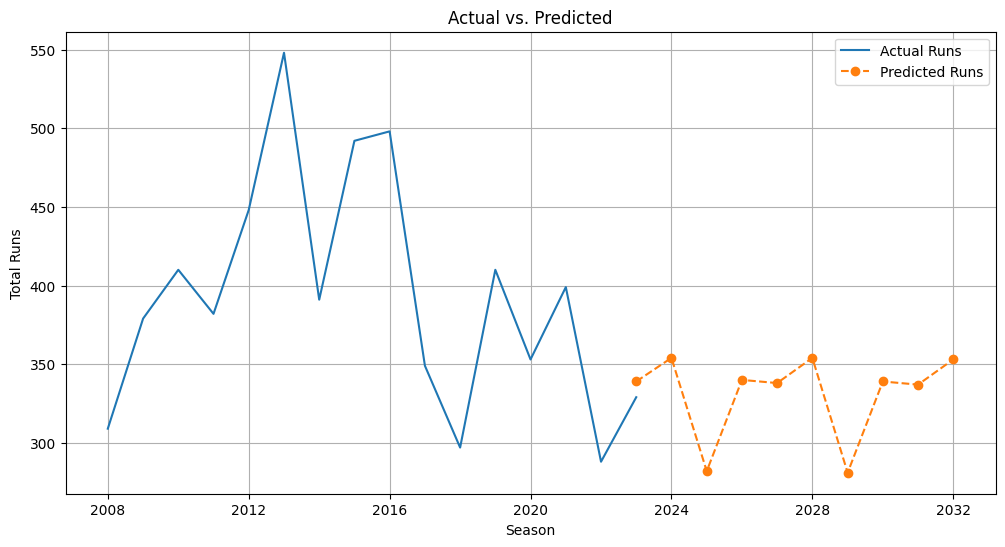

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(total.index, total['runs'], label='Actual Runs')
plt.plot(forecast_df['season'], forecast_df['predicted_runs'], label='Predicted Runs', linestyle='--', marker='o')
plt.title('Actual vs. Predicted')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend()
plt.grid(True)
plt.show()